In [1]:
%reset
%matplotlib inline

import netCDF4 as nc
import cmocean
import numpy as np
import xarray as xr
import xrft
from xgcm import Grid
import matplotlib.pyplot as plt
import scipy.interpolate

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


### Reading in data for hmix=5:

In [2]:
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
# fs_025 = xr.open_dataset('static.nc', decode_times=False)
# av_025 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
# fs_0125 = xr.open_dataset('static.nc', decode_times=False)
# av_0125 = xr.open_dataset('averages_00004502.nc', decode_times=False)

# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
# fs_00625 = xr.open_dataset('static.nc', decode_times=False)
# av_00625 = xr.open_dataset('averages_00004502.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/
fs_003125 = xr.open_dataset('static.nc', decode_times=False)
av_003125 = xr.open_dataset('averages_00002702.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


### Reading in data for parameterized runs

In [3]:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
os_05 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_05 = xr.open_mfdataset('averages_00031502.nc', decode_times=False)   



# %cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/05deg_KS02_COEF07/
# test1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

# %cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/05deg_KS025_COEF1/
# test2 =  xr.open_dataset('averages_00031502.nc', decode_times=False)  

# #Contains default setup based on Jansen et al 2019. MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_GM_BS_default/
# av_05_GMBS =  xr.open_dataset('averages_00031502.nc', decode_times=False)  

# ## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
# av_05_BS =  xr.open_dataset('averages_00031502.nc', decode_times=False)    

# ## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
# av_05_GM =  xr.open_dataset('averages_00031502.nc', decode_times=False)  


##Increasing BS
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16/
av_05_BS1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2/
av_05_BS2 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test4/
av_05_BS3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test5
av_05_BS4 = xr.open_dataset('averages_00031502.nc', decode_times=False)  



/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test16
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test4
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test5


In [4]:
grid_05= Grid(av_05, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

# grid_025= Grid(av_025, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
#                         'Y': {'center': 'yh', 'outer': 'yq'}});
# grid_0125= Grid(av_0125, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
#                         'Y': {'center': 'yh', 'outer': 'yq'}});
# grid_00625= Grid(av_00625, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
#                         'Y': {'center': 'yh', 'outer': 'yq'}});
grid_003125= Grid(av_003125, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


#Interpolating surface u,v to be on the same grid points. Using only 100 days, or 20 time steps:
# dx_025= grid_025.interp(fs_025.dxCu,axis='X'); dy_025= grid_025.interp(fs_025.dyCv,axis='Y')
# u_025 = grid_025.interp(av_025.SSU[0:20,:,:],axis='X'); 
# v_025 = grid_025.interp(av_025.SSV[0:20,:,:],axis='Y')

dx_003125= grid_003125.interp(fs_003125.dxCu,axis='X'); dy_003125= grid_003125.interp(fs_003125.dyCv,axis='Y')
v_003125 = grid_003125.interp(av_003125.SSV[0:20,:,:],axis='Y')

dx_05= grid_05.interp(fs_05.dxCu,axis='X'); dy_05= grid_05.interp(fs_05.dyCv,axis='Y')

v_05 = grid_05.interp(av_05.SSV[0:100,:,:],axis='Y')
#v_05_GMBS = grid_05.interp(av_05_GMBS.SSV[0:100,:,:],axis='Y')
#v_05_GM   = grid_05.interp(av_05_GM.SSV[0:100,:,:],axis='Y')
#v_05_BS   = grid_05.interp(av_05_BS.SSV[0:100,:,:],axis='Y')
v_05_BS1   = grid_05.interp(av_05_BS1.SSV[0:100,:,:],axis='Y')
v_05_BS2   = grid_05.interp(av_05_BS2.SSV[0:100,:,:],axis='Y')
v_05_BS3   = grid_05.interp(av_05_BS3.SSV[0:100,:,:],axis='Y')
v_05_BS4   = grid_05.interp(av_05_BS4.SSV[0:100,:,:],axis='Y')



In [5]:
print(v_05.shape)


(100, 280, 120)


In [6]:
# #Plotting Surface KE 
# fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
# ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
# ax1.set_facecolor((0.92, 0.92, 0.92))
# ax1.set_title('1/32$^\circ$ Surface KE',fontsize=14)

# ax1.set_xlabel('Longitude',fontsize=16)
# ax1.set_ylabel('Latitude',fontsize=16)
# ax1.tick_params(labelsize=16); 
# ax2.tick_params(labelsize=14)
# ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)


# levels=np.linspace(-5,0,11)
# plotted =ax1.contourf(u_003125.xh,u_003125.yh,np.log10(0.5*(u_003125[-1]**2+v_003125[-1]**2)),levels=levels,cmap=cmocean.cm.matter_r,extend='both')

# ax1.set_aspect('equal', 'box')
# cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
# cbar.ax.tick_params(labelsize=14);
# #
# plt.show()

## We will now change the x-coordinates to be in units of meters rather than degrees.

In [7]:
xi_05=dx_05.cumsum(axis=1)-dx_05[:,0]
#xi_025=dx_025.cumsum(axis=1)-dx_025[:,0] #subtract first dx so that we start at x=0m.
xi_003125=dx_003125.cumsum(axis=1)-dx_003125[:,0]

In [17]:
print(fs_05.geolat[240,0])

<xarray.DataArray 'geolat' ()>
array(50.25)
Coordinates:
    xh       float64 0.25
    yh       float64 50.25
Attributes:
    long_name:     Latitude of tracer (T) points
    units:         degrees_north
    cell_methods:  time: point


### Computing the 1D spectrum at latitude using meridional eddy velocity v'

In [9]:
ilat = 40
boundary=5 #cutting this number of points off of each boundary. 
for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
    
# for i in range(ilat,ilat+1):
#     xline= xi_05[i,boundary:-boundary]
#     vline= v_05_GMBS[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
#     vline= vline - vline.mean('time')
#     viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
#     ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
#     nk = int(len(ekeiso)/2.)
#     ekeiso_05_GMBS=ekeiso[nk+1:]    # half of the latitude array size
# for i in range(ilat,ilat+1):
#     xline= xi_05[i,boundary:-boundary]
#     vline= v_05_GM[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
#     vline= vline - vline.mean('time')
#     viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
#     ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
#     nk = int(len(ekeiso)/2.)
#     ekeiso_05_GM=ekeiso[nk+1:]    # half of the latitude array size
for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS1[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS1=ekeiso[nk+1:]    # half of the latitude array size
    
for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS2=ekeiso[nk+1:]    # half of the latitude array size

for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS3[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS3=ekeiso[nk+1:]    # half of the latitude array size

for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS4[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS4=ekeiso[nk+1:]    # half of the latitude array size
    
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(ilat*16,ilat*16+1):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


In [23]:
# 

Text(0, 0.5, '[m$^3$ s$^{-2}$]')

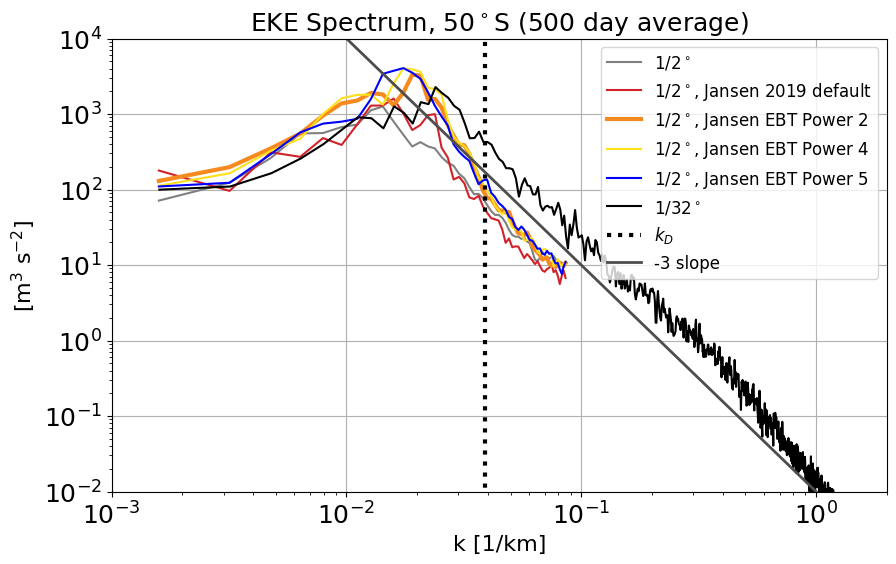

In [13]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)

plt.plot(wavenumber_05,ekeiso_05,'-',color=[0.5, 0.5, 0.5],label='$1/2^\circ$')
#plt.plot(wavenumber_05,ekeiso_05_GMBS,'-',color='#D12229',label='$1/2^\circ$,GM+BS')
#plt.plot(wavenumber_05,ekeiso_05_GM,'-',color='#ffb703',label='$1/2^\circ$ GM')
plt.plot(wavenumber_05,ekeiso_05_BS1,'-',color='#D12229',label='$1/2^\circ$, Jansen 2019 default')
plt.plot(wavenumber_05,ekeiso_05_BS2,'-',linewidth=3,color='#F68A1E',label='$1/2^\circ$, Jansen EBT Power 2')

plt.plot(wavenumber_05,ekeiso_05_BS3,'-',color='#FDE01A',label='$1/2^\circ$, Jansen EBT Power 4')
plt.plot(wavenumber_05,ekeiso_05_BS4,'-',color='b',label='$1/2^\circ$, Jansen EBT Power 5')

plt.plot(wavenumber_003125,ekeiso_003125,color='k',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('EKE Spectrum, 50$^\circ$S (500 day average)',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.legend(fontsize=12,loc='upper right')

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

In [18]:
ilat = 240
boundary=5 #cutting this number of points off of each boundary. 
for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
    
# for i in range(ilat,ilat+1):
#     xline= xi_05[i,boundary:-boundary]
#     vline= v_05_GMBS[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
#     vline= vline - vline.mean('time')
#     viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
#     ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
#     nk = int(len(ekeiso)/2.)
#     ekeiso_05_GMBS=ekeiso[nk+1:]    # half of the latitude array size
# for i in range(ilat,ilat+1):
#     xline= xi_05[i,boundary:-boundary]
#     vline= v_05_GM[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
#     vline= vline - vline.mean('time')
#     viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
#     ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
#     nk = int(len(ekeiso)/2.)
#     ekeiso_05_GM=ekeiso[nk+1:]    # half of the latitude array size
for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS1[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS1=ekeiso[nk+1:]    # half of the latitude array size
    
for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS2=ekeiso[nk+1:]    # half of the latitude array size

for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS3[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS3=ekeiso[nk+1:]    # half of the latitude array size

for i in range(ilat,ilat+1):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_BS4[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    ekeiso_05_BS4=ekeiso[nk+1:]    # half of the latitude array size
    
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(ilat*16,ilat*16+1):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

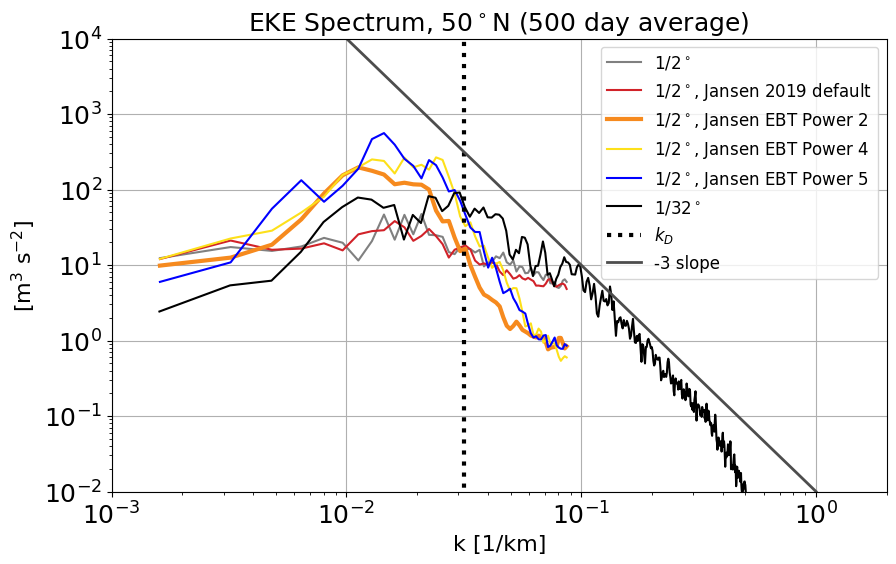

In [19]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)

plt.plot(wavenumber_05,ekeiso_05,'-',color=[0.5, 0.5, 0.5],label='$1/2^\circ$')
#plt.plot(wavenumber_05,ekeiso_05_GMBS,'-',color='#D12229',label='$1/2^\circ$,GM+BS')
#plt.plot(wavenumber_05,ekeiso_05_GM,'-',color='#ffb703',label='$1/2^\circ$ GM')
plt.plot(wavenumber_05,ekeiso_05_BS1,'-',color='#D12229',label='$1/2^\circ$, Jansen 2019 default')
plt.plot(wavenumber_05,ekeiso_05_BS2,'-',linewidth=3,color='#F68A1E',label='$1/2^\circ$, Jansen EBT Power 2')

plt.plot(wavenumber_05,ekeiso_05_BS3,'-',color='#FDE01A',label='$1/2^\circ$, Jansen EBT Power 4')
plt.plot(wavenumber_05,ekeiso_05_BS4,'-',color='b',label='$1/2^\circ$, Jansen EBT Power 5')

plt.plot(wavenumber_003125,ekeiso_003125,color='k',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('EKE Spectrum, 50$^\circ$N (500 day average)',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.legend(fontsize=12,loc='upper right')

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

In [32]:
boundary=5 #cutting this number of points off of each boundary. 
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
    
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM1[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM1=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       

for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM2=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM3[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM3=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       
for i in range(240,241):
    xline= xi_05[i,boundary:-boundary]
    vline= v_05_GM4[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_05_GM4=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_05= (ekeiso_05.freq_xh*1e3*2*np.pi)       



# boundary=10 #cutting this number of points off of each boundary. 
# for i in range(480,481):
#     xline= xi_025[i,boundary:-boundary]
#     vline= v_025[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
#     vline= vline - vline.mean('time')
#     viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
#     ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
#     nk = int(len(ekeiso)/2.)

#     ekeiso_025=ekeiso[nk+1:]    # half of the latitude array size
#     wavenumber_025= (ekeiso_025.freq_xh*1e3*2*np.pi)       
#     centroid_025 = np.nansum(ekeiso_025*wavenumber_025)/np.nansum(ekeiso_025)

    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(3840,3841):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

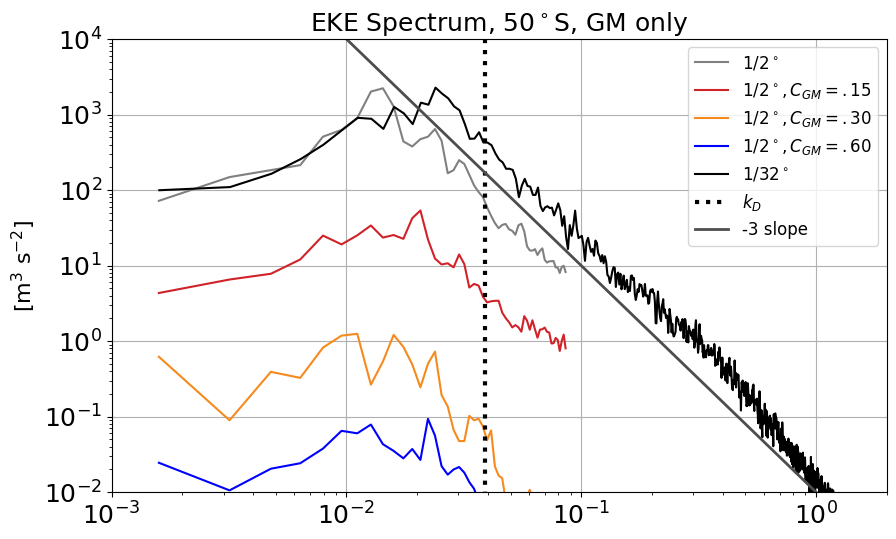

In [33]:
fig, ax = plt.subplots(figsize=(10,6),dpi=100)

plt.plot(wavenumber_05,ekeiso_05,'-',color=[0.5, 0.5, 0.5],label='$1/2^\circ$')
plt.plot(wavenumber_05,ekeiso_05_GM1,'-',color='#D12229',label='$1/2^\circ,C_{GM}=.15$')
plt.plot(wavenumber_05,ekeiso_05_GM2,'-',color='#F68A1E',label='$1/2^\circ,C_{GM}=.30$')
#plt.plot(wavenumber_05,ekeiso_05_GM3,'-',color='#FDE01A',label='$1/2^\circ,C_{GM}=.50$')
plt.plot(wavenumber_05,ekeiso_05_GM4,'-',color='b',label='$1/2^\circ,C_{GM}=.60$')
plt.plot(wavenumber_003125,ekeiso_003125,color='k',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('EKE Spectrum, 50$^\circ$N, GM only',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
plt.legend(fontsize=12,loc='upper right')

plt.tick_params(labelsize=18);
#ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)

In [13]:
print(fs_025.geolat[340,0])

<xarray.DataArray 'geolat' ()>
array(15.125)
Coordinates:
    xh       float64 0.125
    yh       float64 15.12
Attributes:
    long_name:     Latitude of tracer (T) points
    units:         degrees_north
    cell_methods:  time: point


### Computing the 1D spectrum at 15 deg. North using meridional eddy velocity v'

In [14]:
boundary=10 #cutting this number of points off of each boundary. 
for i in range(340,341):
    xline= xi_025[i,boundary:-boundary]
    vline= v_025[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_025=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_025= (ekeiso_025.freq_xh*1e3*2*np.pi)       
    centroid_025 = np.nansum(ekeiso_025*wavenumber_025)/np.nansum(ekeiso_025)


boundary=20 #cutting this number of points off of each boundary. 
for i in range(680,681):
    xline= xi_0125[i,boundary:-boundary]
    vline= v_0125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_0125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_0125= (ekeiso_0125.freq_xh*1e3*2*np.pi)       
    centroid_0125 = np.nansum(ekeiso_0125*wavenumber_0125)/np.nansum(ekeiso_0125)
    
boundary=40 #cutting this number of points off of each boundary. 
for i in range(1360,1361):
    xline= xi_00625[i,boundary:-boundary]
    vline= v_00625[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_00625=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_00625= (ekeiso_00625.freq_xh*1e3*2*np.pi)       
    centroid_00625 = np.nansum(ekeiso_00625*wavenumber_00625)/np.nansum(ekeiso_00625)
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(2720,2721):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
    


### Computing the 1D spectrum at 50 deg. South using meridional eddy velocity v'

In [16]:
boundary=10 #cutting this number of points off of each boundary. 
for i in range(80,81):
    xline= xi_025[i,boundary:-boundary]
    vline= v_025[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_025=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_025= (ekeiso_025.freq_xh*1e3*2*np.pi)       
    centroid_025 = np.nansum(ekeiso_025*wavenumber_025)/np.nansum(ekeiso_025)


boundary=20 #cutting this number of points off of each boundary. 
for i in range(160,161):
    xline= xi_0125[i,boundary:-boundary]
    vline= v_0125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_0125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_0125= (ekeiso_0125.freq_xh*1e3*2*np.pi)       
    centroid_0125 = np.nansum(ekeiso_0125*wavenumber_0125)/np.nansum(ekeiso_0125)
    
boundary=40 #cutting this number of points off of each boundary. 
for i in range(320,321):
    xline= xi_00625[i,boundary:-boundary]
    vline= v_00625[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_00625=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_00625= (ekeiso_00625.freq_xh*1e3*2*np.pi)       
    centroid_00625 = np.nansum(ekeiso_00625*wavenumber_00625)/np.nansum(ekeiso_00625)
    
boundary=80 #cutting this number of points off of each boundary. 
for i in range(640,641):
    xline= xi_003125[i,boundary:-boundary]
    vline= v_003125[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    vline= vline - vline.mean('time')
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)
    
    ekeiso_003125=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_003125= (ekeiso_003125.freq_xh*1e3*2*np.pi)       
    centroid_003125 = np.nansum(ekeiso_003125*wavenumber_003125)/np.nansum(ekeiso_003125)
    Ld_wavenumber = 1/(av_003125.Rd1[:].mean('time').mean('xh')[i]/1000)
 

Text(0, 0.5, '[m$^3$ s$^{-2}$]')

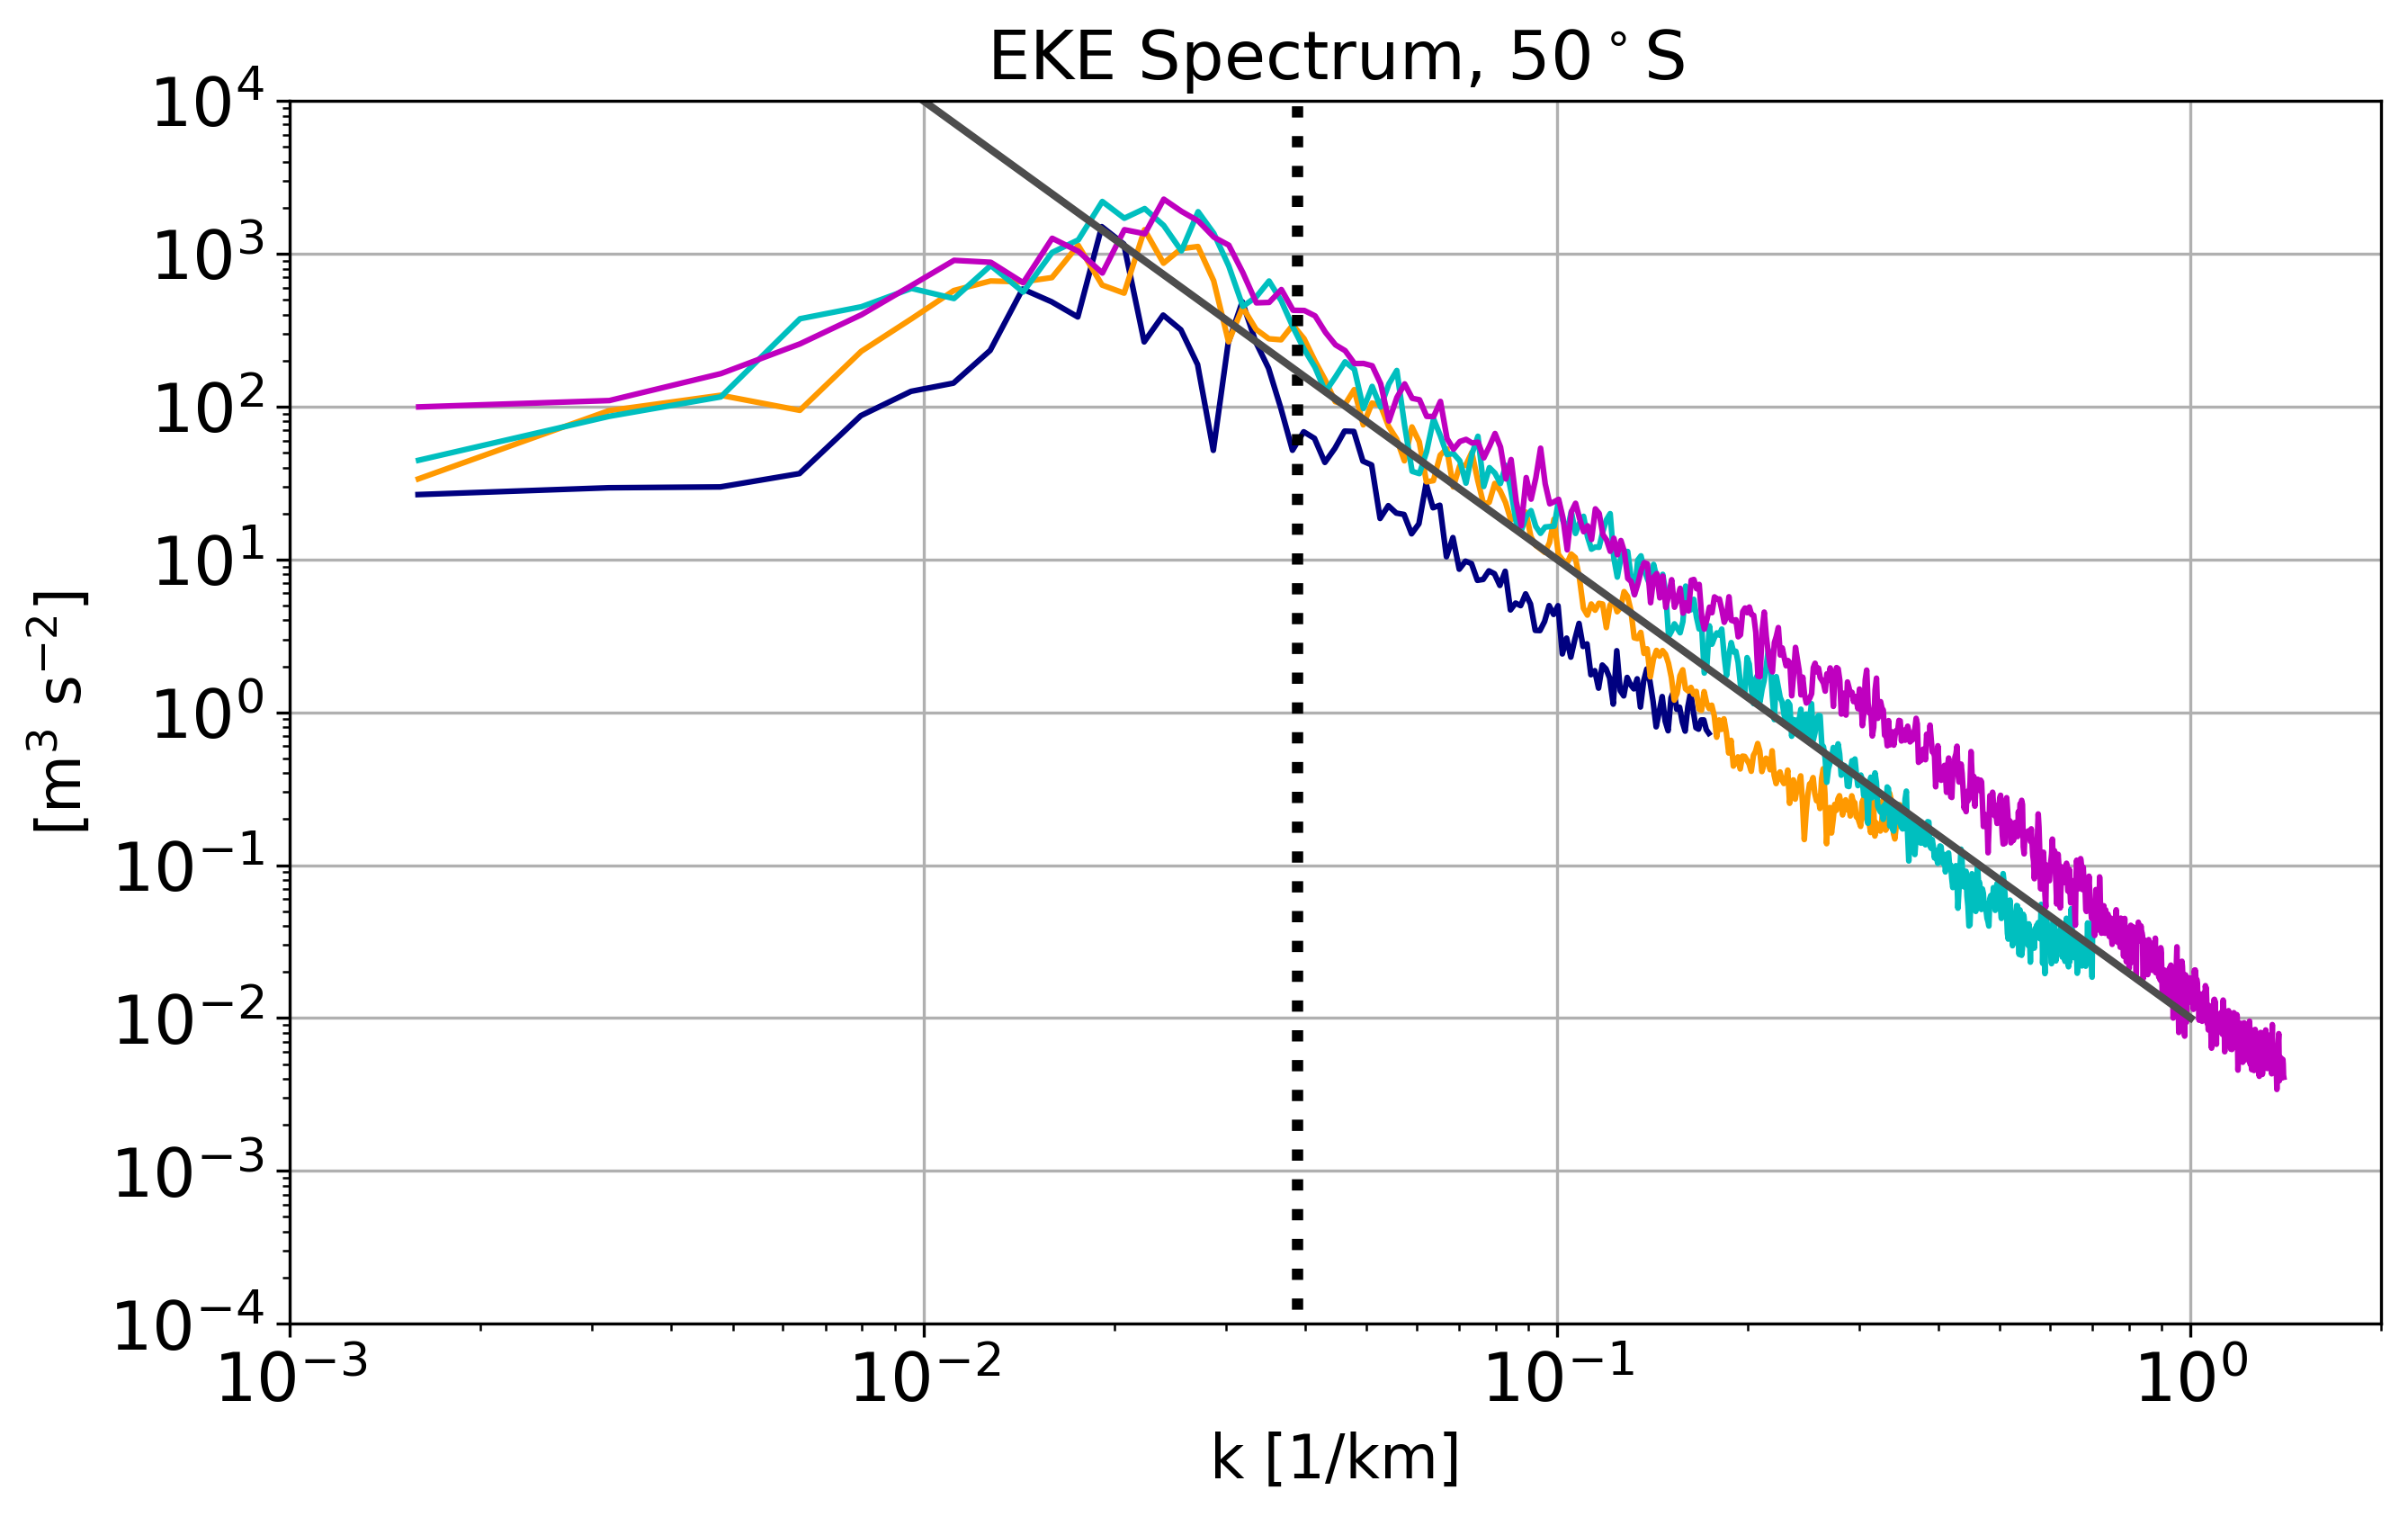

In [17]:
fig, ax = plt.subplots(figsize=(10,6),dpi=300)


plt.plot(wavenumber_025,ekeiso_025,'-',color=[0,0,0.5],label='$1/4^\circ$')
plt.plot(wavenumber_0125,ekeiso_0125,'-',color=[1.,0.6,0],label='$1/8^\circ$')
plt.plot(wavenumber_00625,ekeiso_00625,'-c',label='$1/16^\circ$')
plt.plot(wavenumber_003125,ekeiso_003125,'-m',label='$1/32^\circ$')

plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-6,1e4],':k',linewidth=3,label='$k_D$ = 1/(%.1f km)'%(1/Ld_wavenumber))
plt.plot([1e-2,1e0], [1e4,1e-2],color=[.3,.3,.3],linewidth=2,label='-3 slope')

plt.xscale('log')
plt.yscale('log')
plt.title('EKE Spectrum, 50$^\circ$S',fontsize=18)
plt.ylim([1e-4, 1e4]); plt.xlim([1e-3, 2e0])

plt.grid()
#plt.legend(fontsize=14)

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)